# Тема “Обучение с учителем”

## Задание 1

In [1]:
''' Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте
датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью
функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.
Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля
sklearn.linear_model.
Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на
тестовых.
Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.'''

' Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте\nдатафреймы X и y из этих данных.\nРазбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью\nфункции train_test_split так, чтобы размер тестовой выборки\nсоставлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.\nСоздайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля\nsklearn.linear_model.\nОбучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на\nтестовых.\nВычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.'

In [2]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.datasets import load_boston

In [6]:
boston = load_boston()

In [7]:
data = boston.data
feature_names = boston.feature_names
target = boston.target

In [8]:
X = pd.DataFrame(data, columns = feature_names)

In [9]:
y = pd.DataFrame(target, columns = ['price'])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = lr.predict(X_test)

In [16]:
from sklearn.metrics import r2_score

In [17]:
r2_score(y_test, y_pred)


0.711226005748496

## Задание 2

In [18]:
'''Создайте модель под названием model с помощью RandomForestRegressor из модуля
sklearn.ensemble.
Сделайте агрумент n_estimators равным 1000,
max_depth должен быть равен 12 и random_state сделайте равным 42.
Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно
применение массивов вместо датафрейма.
Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из
предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше.'''

'Создайте модель под названием model с помощью RandomForestRegressor из модуля\nsklearn.ensemble.\nСделайте агрумент n_estimators равным 1000,\nmax_depth должен быть равен 12 и random_state сделайте равным 42.\nОбучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,\nно при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],\nчтобы получить из датафрейма одномерный массив Numpy,\nтак как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно\nприменение массивов вместо датафрейма.\nСделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из\nпредыдущего задания.\nНапишите в комментариях к коду, какая модель в данном случае работает лучше.'

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
model = RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [21]:
model.fit(X_train, y_train.values[:, 0])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [22]:
y_pred = model.predict(X_test)

In [23]:
r2_score(y_test, y_pred)

0.87472606157312

In [24]:
#В данном случае лучше работает модель алгоритма "Случайного леса"

## Задание 3

In [25]:
'''Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.
С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.'''

'Вызовите документацию для класса RandomForestRegressor,\nнайдите информацию об атрибуте feature_importances_.\nС помощью этого атрибута найдите сумму всех показателей важности,\nустановите, какие два признака показывают наибольшую важность.'

In [26]:
model.feature_importances_

array([0.03167574, 0.00154252, 0.00713813, 0.00123624, 0.01426897,
       0.40268179, 0.01429864, 0.06397257, 0.00528122, 0.01152493,
       0.01808108, 0.01245085, 0.41584732])

In [27]:
model.feature_importances_.sum()

1.0

In [28]:
The_most_important = sorted(model.feature_importances_, reverse = True)[:2]
print(The_most_important)

[0.4158473181914483, 0.4026817857034993]


In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.fiigure_format='svg'

Text(0, 0.5, 'Part of importance')

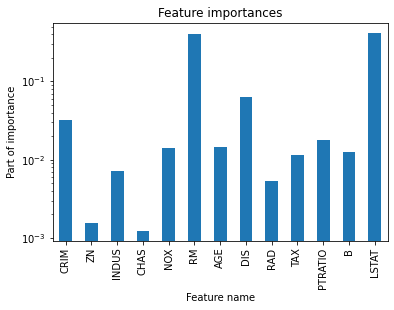

In [35]:
graf = pd.Series(model.feature_importances_, index=feature_names)
graf.plot(kind = 'bar', logy = True)
plt.title('Feature importances')
plt.xlabel('Feature name')
plt.ylabel('Part of importance')

In [36]:
# Для визуальной наглядности какие признаки наиболее значимы - 'RM' и 'LSTAT'